ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
classes = [0 1 2 3 4 5]
X1 = uint8 matrix [3 64 64 1080]
Y1 = int64 matrix [1 1080]
X2 = uint8 matrix [3 64 64 120]
Y2 = int64 matrix [1 120]
classes = [0 1 2 3]
lim = 4
X1 = matrix [12288 720]
Y1oh = matrix [4 720]
lim = 4
X2 = matrix [12288 80]
Y2oh = matrix [4 80]
oh1 = 1
oh2 = 1
BBB = cell [1 23]
BBB{1}.X = matrix [12288 32]
BBB{1}.Y = matrix [4 32]


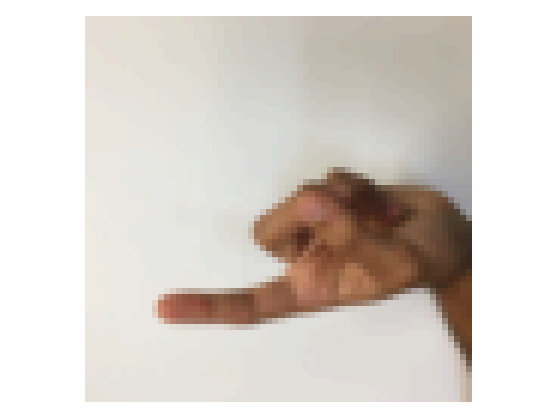

In [1]:
clear all;

global ipynb = 'hand-digits';

source('clearest-nn.m');
source('utils-logging.m');
source('utils-training.m');

% log2file(tmp('log'));

##########################################

data    = load('datasets/train_signs.h5');
classes = data.list_classes;
X1      = data.train_set_x;
Y1      = data.train_set_y;
printvar('classes');
printsize('X1');
printsize('Y1');

data   = load('datasets/test_signs.h5');
X2 = data.test_set_x;
Y2 = data.test_set_y;
printsize('X2');
printsize('Y2');

function [X, Y, Yoh] = PREPARE(X, Y, classes)
    lim = max(classes) + 1
    idx = find(Y < lim);
    X   = slice(X, [], idx);
    Y   = slice(Y, [], idx);
    X   = reshape(X, [], count(X));
    X   = double(X) / 255;
    Yoh = onehots(Y, classes);    
end

classes = classes(find(classes < 4));
printvar('classes');

[X1, Y1, Y1oh] = PREPARE(X1, Y1, classes);
printsize('X1');
printsize('Y1oh');

[X2, Y2, Y2oh] = PREPARE(X2, Y2, classes);
printsize('X2');
printsize('Y2oh');

[X1, Y1, Y1oh] = shuffle(X1, Y1, Y1oh);
[X2, Y2, Y2oh] = shuffle(X2, Y2, Y2oh);

oh1 = all(Y1 == onecolds(Y1oh, classes, -1))
oh2 = all(Y2 == onecolds(Y2oh, classes, -1))

BBB = minibatches(X1, Y1oh, 32);
printsize('BBB');
printsize('BBB{1}.X');
printsize('BBB{1}.Y');

function SHOW(x)
    x = reshape(x, 3, 64, 64, 1);
    x = permute(x, [2, 3, 1]);
    figure;
    imshow(x);
end

function acc = TEST(CTX, X, Y, classes, alt)
    m   = count(X);
    Z   = predict(CTX, X);
    Z   = maxcolds(Z, classes, alt);
    acc = nnz(Z == Y) / m;
end

function TEST1(CTX, x, classes, alt)
    z = predict(CTX, x);
    z = maxcolds(z, classes, alt);
    SHOW(x);
    title(disp(z));
end

SHOW(pick(X1));


In [2]:
[X1norm, X1avg, X1var] = normalize(X1);
X1cov = X1norm * X1norm';
printsize('X1cov');

X1cov = matrix [12288 12288]


In [ ]:
[U,S,V] = svd(X1cov);
% eigvals = diag(S);
U = U(:, 100);
printsize('U');

In [ ]:
X1prj = U' * X1norm;
printsize('X1prj');

In [ ]:
function SHOW(x)
    x = U * x;
    x = x .* X1var;
    x = x .+ X1avg;
    x = reshape(x, 3, 64, 64, 1);
    x = permute(x, [2, 3, 1]);
    figure;
    imshow(x);
end

% BBB = minibatches(X1prj, Y1oh, 32);
% printsize('BBB');
% printsize('BBB{1}.X');
% printsize('BBB{1}.Y');

SHOW(pick(X1prj));


In [ ]:
source('clearest-nn.m');

rand('state', 1);

num_c = count(classes)

CTX = model(12288, {'dense', 25}, 'relu', {'dense', 12}, 'relu', {'dense', num_c}, 'softmax');

num_p = CTX.num_p

CTX = optimization( CTX
                  , {'L2_regularization', 0.0001}
%                   , {'gradient_clipping', 0.5}      
%                   , {'descent', 0.01}
                  , {'adam', 0.0001}
                  );

CTX = objective(CTX, 'logloss');

printmodel('CTX');


In [ ]:
CTX = TRAIN(CTX, BBB, times=11); 
test_accuracy = TEST(CTX, X2, Y2, classes, alt=-1)
save('-binary', tmp('ctx'), 'CTX');

In [ ]:
TEST1(CTX, pick(X2), classes, alt=-1);

In [ ]:
% CTX = model(12288, {'dense', 25}, 'relu', {'dense', 12}, 'relu', {'dense', num_c}, 'softmax');
%                   , {'L2_regularization', 0.0001}
%                   , {'adam', 0.0001}

% NOW = 22-Apr-2020 08:01:57
% GRAD_DIFF =    6.3366e-08
% params_checked =  275
% train_accuracy =  0.25139

% 1000 0.083568

% GRAD_DIFF =  0.00802818764915635
% params_checked =  311
% train_accuracy =  0.986111111111111
% NOW = 22-Apr-2020 08:22:44
% test_accuracy =  0.850000000000000